In [ ]:
!pip install ktrain

In [ ]:
import ktrain
from ktrain import vision as vis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re

PATTERN = r'/\d+_(\d+)_\d+_\d+\.jpg\.chip\.jpg$'
p = re.compile(PATTERN)
r = p.search('/content/drive/MyDrive/UTKFace/1_0_0_20161219140627985.jpg.chip.jpg')

if r is not None:
    gender = int(r.group(1))
    print("Extracted Gender: %d" % gender)
else:
    print("No match found.")


Extracted Gender: 0


In [ ]:
#try this function too
#data_preproc = vis.preprocess_images()

In [ ]:
DATADIR = '/content/drive/MyDrive/UTKFaces'

#preprocessing part
data_aug = vis.get_data_aug(horizontal_flip=True)
(train_data, val_data, preproc) = vis.images_from_fname(DATADIR, pattern=PATTERN, data_aug=data_aug,
                                                      is_regression=False, random_state=42)

In [ ]:
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
#Returns a pre-defined/pre-trained model ready to be trained/fine-tuned
#for multi-class classification. By default, all layers are
#trainable/unfrozen.
model = vis.image_classifier('pretrained_resnet50', train_data, val_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94765736/94765736 [==============================] - 5s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data,
                             workers=8, use_multiprocessing=False, batch_size=64)

In [ ]:
learner.lr_find(max_epochs=4)

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
333/333 [==============================] - 1996s 6s/step - loss: 1.6357 - accuracy: 0.5473
Epoch 2/4
333/333 [==============================] - 319s 943ms/step - loss: 1.1213 - accuracy: 0.7098
Epoch 3/4
333/333 [==============================] - 131s 373ms/step - loss: 6.1361 - accuracy: 0.7440


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


Three possible suggestions for LR from plot:
	Longest valley (red): 1.25E-05
	Min numerical gradient (purple): 6.70E-06
	Min loss divided by 10 (omitted from plot): 5.22E-05


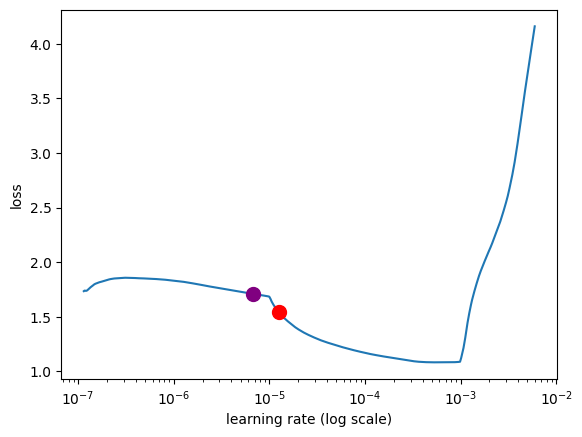

In [ ]:
learner.lr_plot(suggest=True)
#where the loss is falling prior to divergence

In [ ]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
334/334 [==============================] - 607s 2s/step - loss: 1.4087 - accuracy: 0.5869 - val_loss: 0.6689 - val_accuracy: 0.7436
Epoch 2/3
334/334 [==============================] - 334s 983ms/step - loss: 1.0440 - accuracy: 0.6871 - val_loss: 0.6011 - val_accuracy: 0.7963
Epoch 3/3
334/334 [==============================] - 337s 983ms/step - loss: 0.9268 - accuracy: 0.7249 - val_loss: 0.5877 - val_accuracy: 0.8085


In [ ]:
learner.freeze(15) # unfreeze all but the first 15 layers

In [ ]:
#The fit_onecycle method in ktrain implements the 1cycle policy, which is a learning rate scheduling strategy
#introduced by Leslie N. Smith in the paper "Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates"
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
334/334 [==============================] - 379s 1s/step - loss: 1.0461 - accuracy: 0.6900 - val_loss: 0.6172 - val_accuracy: 0.8148
Epoch 2/3
334/334 [==============================] - 358s 1s/step - loss: 0.7901 - accuracy: 0.7691 - val_loss: 0.5395 - val_accuracy: 0.8410
Epoch 3/3
334/334 [==============================] - 361s 1s/step - loss: 0.6822 - accuracy: 0.7992 - val_loss: 0.5280 - val_accuracy: 0.8482


In [ ]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
334/334 [==============================] - 363s 1s/step - loss: 0.6520 - accuracy: 0.8069 - val_loss: 0.5205 - val_accuracy: 0.8490
Epoch 2/3
334/334 [==============================] - 350s 1s/step - loss: 0.6157 - accuracy: 0.8219 - val_loss: 0.5025 - val_accuracy: 0.8659
Epoch 3/3
334/334 [==============================] - 350s 1s/step - loss: 0.5519 - accuracy: 0.8304 - val_loss: 0.4827 - val_accuracy: 0.8693


In [ ]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
334/334 [==============================] - 351s 1s/step - loss: 0.5343 - accuracy: 0.8380 - val_loss: 0.4716 - val_accuracy: 0.8697
Epoch 2/3
334/334 [==============================] - 346s 1s/step - loss: 0.5062 - accuracy: 0.8438 - val_loss: 0.4339 - val_accuracy: 0.8790
Epoch 3/3
334/334 [==============================] - 347s 1s/step - loss: 0.4919 - accuracy: 0.8499 - val_loss: 0.4320 - val_accuracy: 0.8798


In [ ]:
learner.fit_onecycle(1e-5, 5)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/5
334/334 [==============================] - 351s 1s/step - loss: 0.4712 - accuracy: 0.8538 - val_loss: 0.4206 - val_accuracy: 0.8819
Epoch 2/5
334/334 [==============================] - 350s 1s/step - loss: 0.4524 - accuracy: 0.8537 - val_loss: 0.3998 - val_accuracy: 0.8865
Epoch 3/5
334/334 [==============================] - 352s 1s/step - loss: 0.4294 - accuracy: 0.8628 - val_loss: 0.4012 - val_accuracy: 0.8954
Epoch 4/5
334/334 [==============================] - 353s 1s/step - loss: 0.4114 - accuracy: 0.8653 - val_loss: 0.3882 - val_accuracy: 0.8899
Epoch 5/5
334/334 [==============================] - 368s 1s/step - loss: 0.3972 - accuracy: 0.8691 - val_loss: 0.3773 - val_accuracy: 0.8967


In [ ]:
learner.fit_onecycle(1e-5, 2)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
334/334 [==============================] - 346s 1s/step - loss: 0.3967 - accuracy: 0.8687 - val_loss: 0.3803 - val_accuracy: 0.8937
Epoch 2/2
334/334 [==============================] - 349s 1s/step - loss: 0.3667 - accuracy: 0.8779 - val_loss: 0.3625 - val_accuracy: 0.8946


In [ ]:
# get a Predictor instance that wraps model and Preprocessor object
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
# get some random file names of images
!!ls {DATADIR} | sort -R |head -10

['33_0_1_20170113134141083.jpg.chip.jpg',
 '23_1_1_20170117194002005.jpg.chip.jpg',
 '26_1_1_20170117201805678.jpg.chip.jpg',
 '30_1_0_20170117170803122.jpg.chip.jpg',
 '22_1_0_20170116220816105.jpg.chip.jpg',
 '74_0_0_20170111203046542.jpg.chip.jpg',
 '26_0_2_20170116182237706.jpg.chip.jpg',
 '45_0_0_20170113190343889.jpg.chip.jpg',
 '22_1_1_20170112214852574.jpg.chip.jpg',
 '35_0_0_20170120222700840.jpg.chip.jpg']

In [ ]:
# how to get validation filepaths
val_data.filenames[10:20]

['75_0_0_20170111205052872.jpg.chip.jpg',
 '22_1_1_20170114030312289.jpg.chip.jpg',
 '46_1_0_20170104171626722.jpg.chip.jpg',
 '50_0_1_20170117181702370.jpg.chip.jpg',
 '28_1_3_20170119194940491.jpg.chip.jpg',
 '27_1_3_20170108224926503.jpg.chip.jpg',
 '55_0_0_20170117185642242.jpg.chip.jpg',
 '65_0_0_20170117171434763.jpg.chip.jpg',
 '32_0_4_20170105163336092.jpg.chip.jpg',
 '24_0_0_20170117150004378.jpg.chip.jpg']

In [ ]:
def show_prediction(fname):
    fname = DATADIR+'/'+fname
    predicted = predictor.predict_filename(fname)[0]
    actual = int(p.search(fname).group(1))
    vis.show_image(fname)
    print('predicted:%s | actual: %s' % (predicted, actual))

predicted:0 | actual: 1


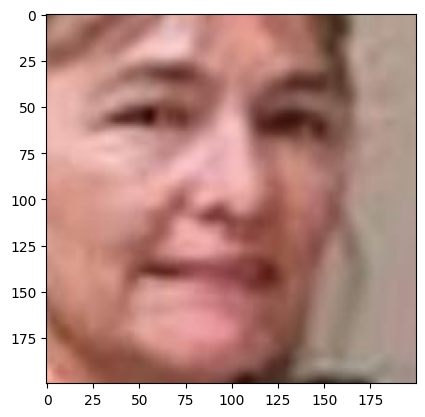

In [ ]:
show_prediction('46_1_0_20170104171626722.jpg.chip.jpg')

predicted:0 | actual: 0


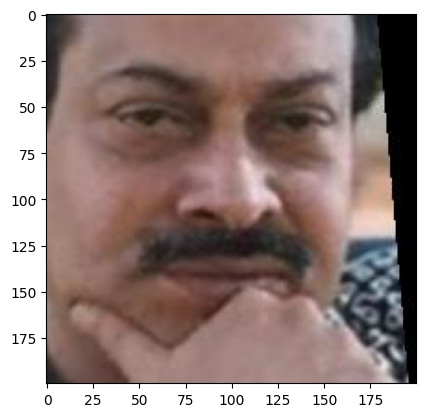

In [ ]:
show_prediction('50_0_1_20170117181702370.jpg.chip.jpg')

predicted:1 | actual: 1


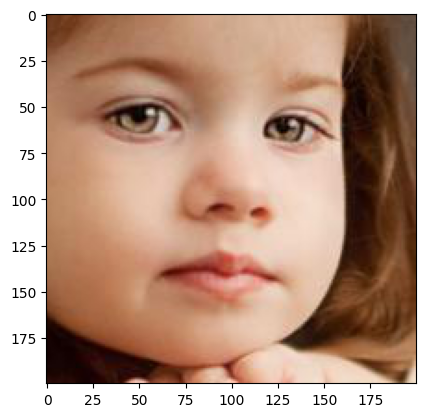

In [ ]:
show_prediction('3_1_0_20170109191511657.jpg.chip.jpg')

In [ ]:
predictor.save('/content/drive/MyDrive/gender_predictor_new')